# Pymaceuticals Inc.
---

### Analysis

- To be added.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")


# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].value_counts()

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = df.set_index('Mouse ID')


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
clean_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
# Ed note: Had to reset the index here for the dataframe because without it, the Mouse ID as the index tossed out indexing errors when attempting to count

clean_df2 = clean_df.reset_index()
clean_df2['Mouse ID'].value_counts()

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_frame = clean_df2.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor_frame['Tumor Volume (mm3)'].mean()
tumor_med = tumor_frame['Tumor Volume (mm3)'].median()
tumor_var = tumor_frame['Tumor Volume (mm3)'].var()
tumor_std = tumor_frame['Tumor Volume (mm3)'].std()
tumor_sem = tumor_frame['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Med" : tumor_med,
                        "Var" : tumor_var,
                        "Std. Dev." : tumor_std,
                        "SEM" : tumor_sem
                        })


# Assemble the resulting series into a single summary DataFrame.
tumor_df

,Mean,Med,Var,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

tumor_reframe = clean_df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_reframe

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

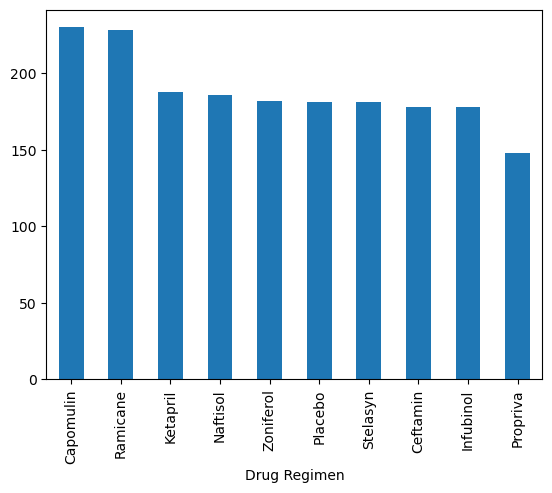

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mousetime = clean_df2.groupby(['Drug Regimen'])['Timepoint'].count()
mousetime.sort_values(ascending=False).plot.bar()
plt.show()

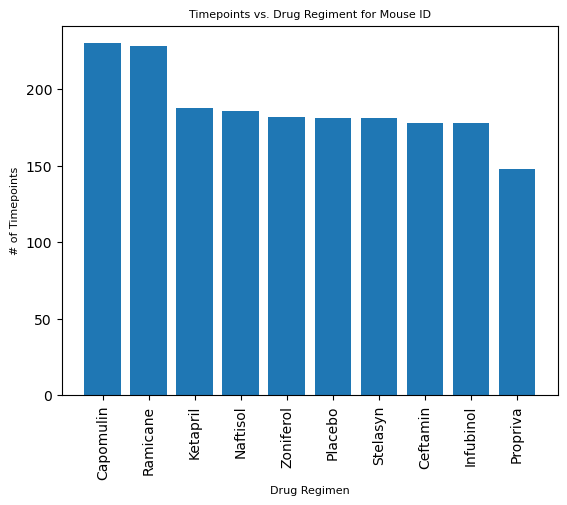

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
remousetime = mousetime.sort_values(ascending=False) 
plt.bar(remousetime.index, remousetime.values)
plt.title('Timepoints vs. Drug Regiment for Mouse ID', size=8)
plt.ylabel('# of Timepoints', size=8)
plt.xlabel('Drug Regimen', size=8) 
plt.xticks(rotation='vertical') 
plt.show()

<bound method PlotAccessor.pie of <pandas.plotting._core.PlotAccessor object at 0x000001F2DE200B50>>

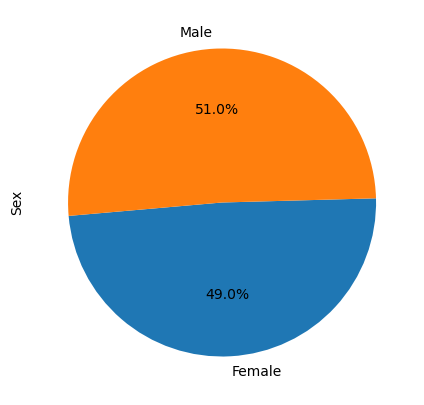

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = clean_df2.groupby(['Sex'])['Sex'].count()
pie.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))
pie.plot.pie

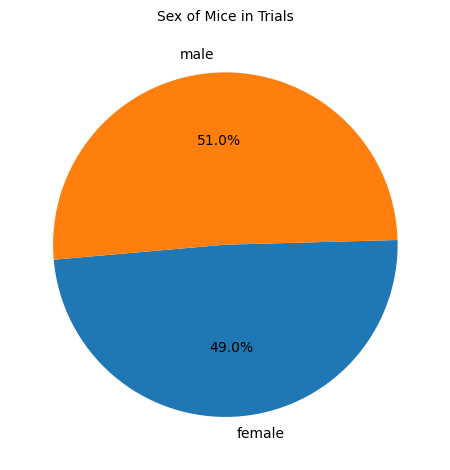

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.title('Sex of Mice in Trials', size=10)
plt.tight_layout() 
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    # many examples of code showed that making the tumor data into a data frame was the easiest way to collate

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# examples from Youtube showed that you could make a list of a list of the data and it would be easier to plot. 


NameError: name 'drug_df' is not defined

## Line and Scatter Plots

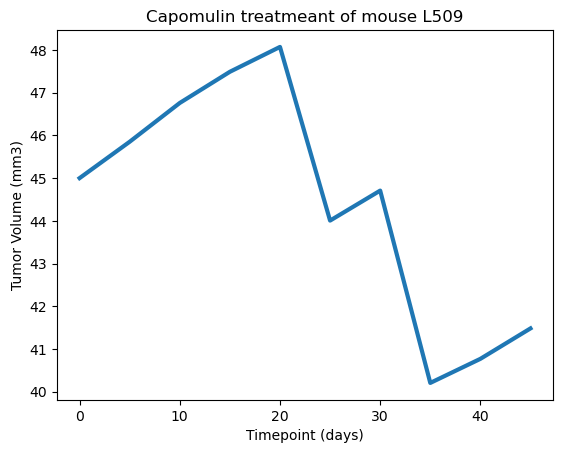

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# went off of code from above to loc out the data for just the L509 mouse
lineplot_df = clean_df2.loc[clean_df2["Mouse ID"] == "l509",:]
lineplot_df
# created a definition for the x-axis using timepoint data from L509
x_axistime = lineplot_df["Timepoint"] 
#created a definition of the tumor size by using the L509 data
tumorsize = lineplot_df["Tumor Volume (mm3)"] 
plt.title('Capomulin treatmeant of mouse L509')
plt.plot(x_axistime, tumorsize,linewidth=3, markersize=12) 
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

NameError: name 'Capomulin_df' is not defined

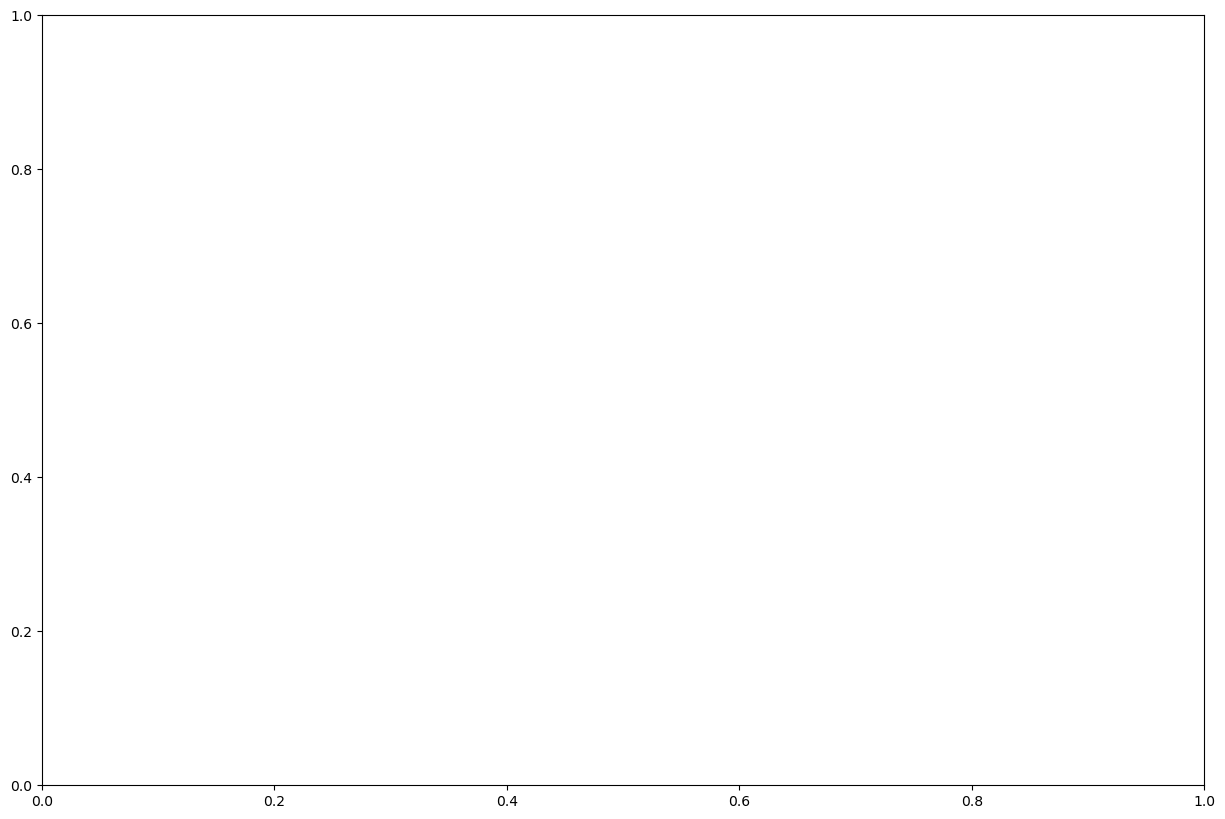

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
